# DS-SF-27 | Final Project 4 | Modeling Performance

In [47]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

from sklearn import decomposition, cluster,preprocessing

%matplotlib inline
plt.style.use('ggplot')

In [48]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', '26_channels_over_5_months_tot_duration_MAC_80.csv'))

df.head()

,6ter,m6,w9,nrj12,cherie25,c8,france2,france3,franceo,nt1,tf1,tmc,numero23,arte,france5,rmc,lcp,france4,gulli,itele,franceinfo,lci,bfmtv,cstar,hd1,equipe21
0,27011,205730,97611,58435,3056,59432,771772,84204,11057,34871,330284,108557,6294,77604,98262,16595,63798,98126,11215,13488,0,3413,24845,20539,60513,6040
1,0,0,0,0,0,0,0,0,0,716,4559,0,0,0,0,0,0,0,5870,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,8182,0,416,0,0,0,0,0,0,0,0,0,0,0,0,0
3,31517,673943,150210,21094,7743,19508,73317,26078,3165,29650,114901,22468,5331,13444,61326,11452,1743,18924,632,6841,0,2809,21750,9957,26350,11465
4,6374,90786,30920,33465,7415,9268,130689,106071,2043,11681,82853,25278,251,0,0,0,0,20404,279,1720,185,0,28370,8636,12449,11373


In [49]:
df.shape

(56337, 26)

## Checking for outliers

In [50]:
#Q1_series=df.quantile(0.25)
#Q3_series=df.quantile(0.75)

#IQR_series= Q3_series - Q1_series

#upperbound_series = Q3_series + 1.5 * IQR_series
#lowerbound_series = Q1_series - 1.5 * IQR_series

#for i in range(upperbound_series.shape[0]):
#    df.drop(df[df[[i]] > upperbound_series[i]].index, inplace = True)
#    df.drop(df[df[[i]] < lowerbound_series[i]].index, inplace = True)

Above is code to remove outliers each columns at a time but I ended not using it and removing outliers by looking at the whole sum of each columns as seen below:

In [51]:
Q1 = df.sum(axis=1).quantile(0.25)
Q3 = df.sum(axis=1).quantile(0.75)

IQR = Q3 - Q1

IQR
df.drop(df[df.sum(axis=1) > Q3 + 1.5 * IQR].index, inplace = True)
df.drop(df[df.sum(axis=1) < Q1 - 1.5 * IQR].index, inplace = True)


In [52]:
df.shape

(55258, 26)

We ended removing 1 079 outliers out of the dataset of 56 337 households

In [53]:
df.describe()

,6ter,m6,w9,nrj12,cherie25,c8,france2,france3,franceo,nt1,tf1,tmc,numero23,arte,france5,rmc,lcp,france4,gulli,itele,franceinfo,lci,bfmtv,cstar,hd1,equipe21
count,55258.000000,5.525800e+04,5.525800e+04,55258.000000,55258.000000,55258.000000,5.525800e+04,5.525800e+04,55258.000000,55258.000000,5.525800e+04,5.525800e+04,55258.000000,5.525800e+04,5.525800e+04,5.525800e+04,55258.000000,5.525800e+04,5.525800e+04,5.525800e+04,55258.000000,55258.000000,5.525800e+04,55258.000000,5.525800e+04,5.525800e+04
mean,18049.345868,1.219283e+05,3.938693e+04,29069.081708,13317.902765,38761.617956,1.297106e+05,9.183341e+04,9185.234971,29287.001900,1.868412e+05,3.452273e+04,11047.375385,2.436321e+04,3.633609e+04,2.192281e+04,3735.359188,2.587009e+04,2.487112e+04,1.140773e+04,387.020992,2358.290094,3.907175e+04,19767.269536,2.264731e+04,1.984607e+04
std,45497.496712,1.502438e+05,6.337347e+04,55197.848384,33780.154642,67731.310847,1.846926e+05,1.360412e+05,24870.792205,48547.784748,2.134901e+05,6.101514e+04,27329.846914,5.528257e+04,7.322676e+04,6.318508e+04,13037.737188,5.580921e+04,7.307966e+04,4.564381e+04,3027.987802,14223.567406,9.840731e+04,43771.432442,5.195185e+04,6.073601e+04
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,1.652450e+04,1.759000e+03,0.000000,0.000000,1421.000000,1.095925e+04,7.429000e+03,0.000000,292.000000,2.812600e+04,1.065250e+03,0.000000,0.000000e+00,2.432500e+02,0.000000e+00,0.000000,2.362500e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,2305.000000,6.808150e+04,1.627150e+04,8556.000000,698.000000,14548.000000,5.639650e+04,4.123900e+04,0.000000,10680.500000,1.084030e+05,1.464400e+04,963.000000,5.870000e+03,8.873000e+03,7.480000e+02,0.000000,8.521000e+03,1.070000e+03,0.000000e+00,0.000000,0.000000,4.445500e+03,4186.500000,4.496000e+03,4.410000e+02
75%,15757.500000,1.703798e+05,4.786225e+04,31649.250000,11243.750000,43709.750000,1.709622e+05,1.208918e+05,8932.000000,36130.500000,2.757670e+05,4.123150e+04,10427.750000,2.364475e+04,3.628450e+04,1.288800e+04,2599.750000,2.674350e+04,1.383800e+04,4.355000e+03,0.000000,495.000000,2.754250e+04,19514.750000,2.124625e+04,1.019350e+04
max,853081.000000,1.511844e+06,1.087688e+06,817187.000000,650794.000000,934995.000000,1.837356e+06,1.757866e+06,648177.000000,704212.000000,1.799809e+06,1.138597e+06,795446.000000,1.193536e+06,1.295289e+06,1.535486e+06,757083.000000,1.343916e+06,1.332034e+06,1.264118e+06,145804.000000,949331.000000,1.742493e+06,917406.000000,1.190740e+06,1.254609e+06


## Feature engineering

Here we go from a matrice of durations to a matrice of 0s and 1s by filtering the whole dataframe with the conditions of watching 60 hours of a specific TV channel over 5 months.

In [54]:
df_bool=df>=(60*60*60)

df_exp=df_bool.astype(int)

In [55]:
df_exp.describe()

,6ter,m6,w9,nrj12,cherie25,c8,france2,france3,franceo,nt1,tf1,tmc,numero23,arte,france5,rmc,lcp,france4,gulli,itele,franceinfo,lci,bfmtv,cstar,hd1,equipe21
count,55258.000000,55258.000000,55258.000000,55258.000000,55258.000000,55258.000000,55258.000000,55258.000000,55258.000000,55258.000000,55258.000000,55258.000000,55258.000000,55258.000000,55258.000000,55258.000000,55258.000000,55258.000000,55258.000000,55258.000000,55258.0,55258.000000,55258.000000,55258.000000,55258.000000,55258.000000
mean,0.011401,0.188154,0.027670,0.018947,0.004995,0.031905,0.198360,0.120906,0.002443,0.012469,0.317692,0.020033,0.002859,0.016034,0.034149,0.021499,0.000543,0.018549,0.027525,0.009628,0.0,0.000706,0.048663,0.009845,0.014894,0.020088
std,0.106166,0.390838,0.164028,0.136341,0.070497,0.175748,0.398769,0.326020,0.049368,0.110966,0.465583,0.140115,0.053397,0.125607,0.181613,0.145042,0.023294,0.134928,0.163610,0.097648,0.0,0.026557,0.215164,0.098732,0.121129,0.140301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


The code below can be used to scale each columns but we don't need it here as all the columns already range from 0 to 1 as can be verified in the description of the new dataframe above.

In [56]:
#scaler = preprocessing.MinMaxScaler().fit(X)
#X = scaler.transform(X)

## Principal Component Analysis (PCA)

We assign the dataframe with 0s and 1s to our feature matrix X:

In [57]:
X = df_exp

In [58]:
X

,6ter,m6,w9,nrj12,cherie25,c8,france2,france3,franceo,nt1,tf1,tmc,numero23,arte,france5,rmc,lcp,france4,gulli,itele,franceinfo,lci,bfmtv,cstar,hd1,equipe21
0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
pca = decomposition.PCA().fit(X)

In [60]:
pca.n_components_

26

### Explained Variance

In [61]:
normalized_eigenvalues = pca.explained_variance_ratio_

In [62]:
normalized_eigenvalues

array([  3.01489198e-01,   1.68572475e-01,   1.10582424e-01,
         7.60447702e-02,   4.68038425e-02,   3.37186782e-02,
         3.20819999e-02,   2.97153908e-02,   2.79753296e-02,
         2.18398409e-02,   2.08263079e-02,   1.95217841e-02,
         1.59288872e-02,   1.54950137e-02,   1.44069598e-02,
         1.34141112e-02,   1.12246570e-02,   1.01721236e-02,
         9.52507516e-03,   9.28721377e-03,   4.84332701e-03,
         2.80431235e-03,   2.46764449e-03,   7.14502212e-04,
         5.44131822e-04,   1.79215222e-33])

In [63]:
normalized_eigenvalues.sum()

1.0

### Screen plot

(-0.01, 0.31148919806418746)

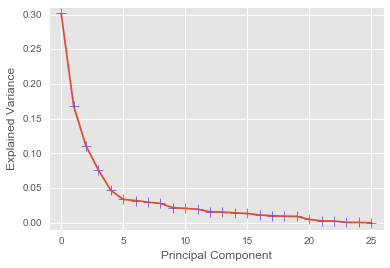

In [64]:
plt.plot(normalized_eigenvalues)

plt.scatter(x = range(len(normalized_eigenvalues)),
    y = normalized_eigenvalues,
    marker = '+',
    s = 100)

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.xlim(-1, len(normalized_eigenvalues))
plt.ylim(-.01, max(normalized_eigenvalues) + .01)

In [65]:
cumulated_normalized_eigenvalues = np.cumsum(normalized_eigenvalues)

In [66]:
cumulated_normalized_eigenvalues

array([ 0.3014892 ,  0.47006167,  0.5806441 ,  0.65668887,  0.70349271,
        0.73721139,  0.76929339,  0.79900878,  0.82698411,  0.84882395,
        0.86965026,  0.88917204,  0.90510093,  0.92059594,  0.9350029 ,
        0.94841701,  0.95964167,  0.96981379,  0.97933887,  0.98862608,
        0.99346941,  0.99627372,  0.99874137,  0.99945587,  1.        ,  1.        ])

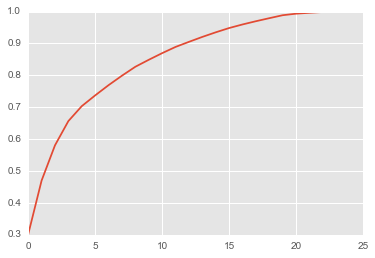

In [67]:
plt.plot(cumulated_normalized_eigenvalues)

### We now reduce the amount of dimensions from 26 to 3:

In [68]:
X = df_exp

pca = decomposition.PCA(n_components=3).fit(X)

X = pca.transform(X.sort_index())

X = pd.DataFrame({'PC0': X.T[0],'PC1': X.T[1],'PC2': X.T[2]})
X

,PC0,PC1,PC2
0,0.684279,0.381191,-0.388265
1,-0.443741,-0.032677,0.001934
2,-0.443741,-0.032677,0.001934
3,0.017840,-0.362816,0.805260
4,-0.443741,-0.032677,0.001934
5,-0.384910,-0.052167,0.050517
6,0.041342,-0.384203,0.812001
7,-0.443741,-0.032677,0.001934
8,-0.443741,-0.032677,0.001934
9,-0.443741,-0.032677,0.001934


In [69]:
eigenvector_0 = pca.components_[0]
eigenvector_1 = pca.components_[1]
eigenvector_2 = pca.components_[2]

### We plot all the observations from our dataset in the new 3 dimensions space:

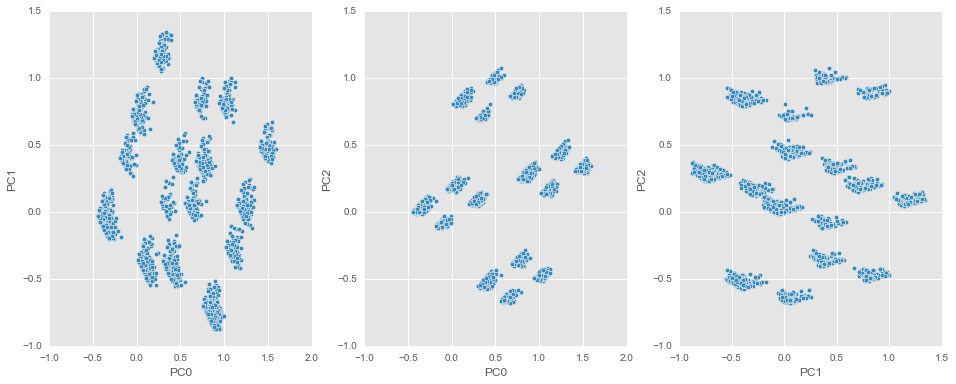

In [70]:
_, axes = plt.subplots(1, 3, figsize = (16, 6))

X.plot(kind ='scatter', x='PC0', y='PC1', ax = axes[0])
X.plot(kind ='scatter', x='PC0', y='PC2', ax = axes[1])
X.plot(kind ='scatter', x='PC1', y='PC2', ax = axes[2])

We can clearly see 16 small cuslters so we're going to try to run the k means algorithm for 16 clusters.

## k-Means

### n_clusters = 16

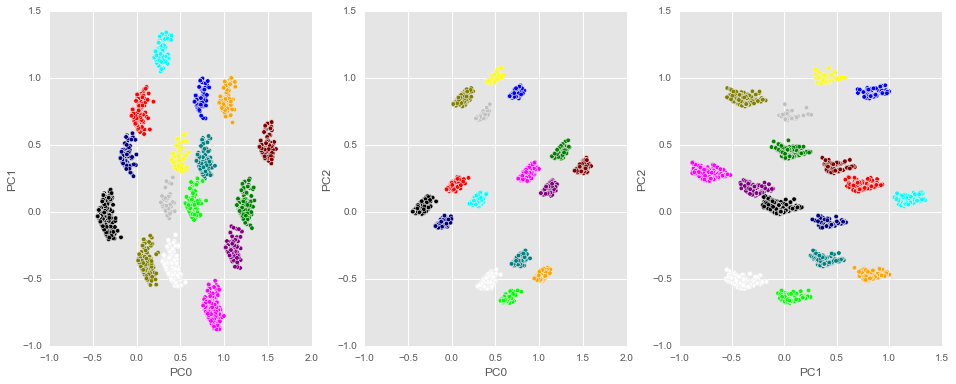

In [71]:
model = cluster.KMeans(n_clusters = 16, random_state = 0).fit(X)

cluster_ = pd.Series(model.labels_)

color = cluster_.map({0: 'black', 1: 'orange', 2: 'fuchsia', 3: 'white'\
                      ,4:'maroon', 5: 'red', 6: 'olive', 7: 'yellow'\
                      ,8:'green', 9: 'lime', 10: 'teal', 11: 'aqua'\
                     , 12: 'navy', 13: 'blue', 14: 'purple', 15: 'silver'\
                     , 16: 'gray', 17:'brown'})

_, axes = plt.subplots(1, 3, figsize = (16, 6))

X.plot(kind = 'scatter', x = 'PC0', y = 'PC1', c = color, ax = axes[0])
X.plot(kind = 'scatter', x = 'PC0', y = 'PC2', c = color, ax = axes[1])
X.plot(kind = 'scatter', x = 'PC1', y = 'PC2', c = color, ax = axes[2])

In [72]:
cluster_.value_counts()

0     29181
3      6114
2      4251
5      2930
6      2193
10     1789
11     1604
8      1547
1      1387
9      1078
4       825
12      778
7       572
14      564
13      307
15      138
dtype: int64

We can see that k-means performed perfectly but we can also see that each diagonals on the 1st view corresponds to each square on the 2nd view which corresponds to each wave on the 3rd view. So let's try to k-means with 4 clusters instead of 16.

### n_clusters = 4

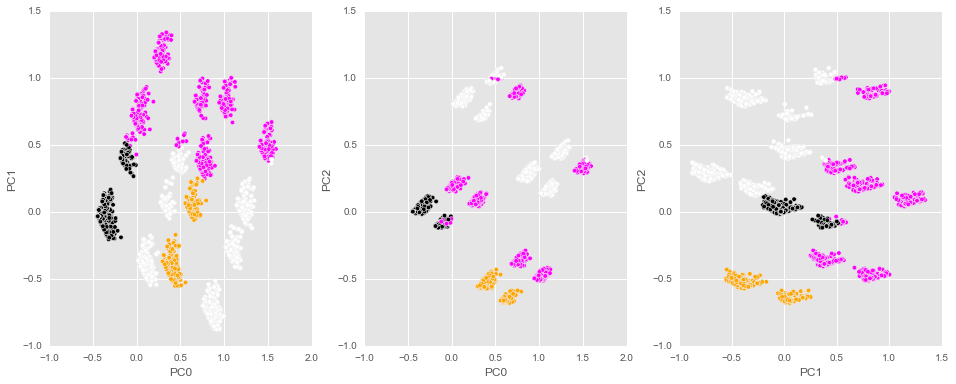

In [46]:
model = cluster.KMeans(n_clusters = 4, random_state = 0).fit(X)

cluster_ = pd.Series(model.labels_)

color = cluster_.map({0: 'black', 1: 'orange', 2: 'fuchsia', 3: 'white'})

_, axes = plt.subplots(1, 3, figsize = (16, 6))

X.plot(kind = 'scatter', x = 'PC0', y = 'PC1', c = color, ax = axes[0])
X.plot(kind = 'scatter', x = 'PC0', y = 'PC2', c = color, ax = axes[1])
X.plot(kind = 'scatter', x = 'PC1', y = 'PC2', c = color, ax = axes[2])

We can see that k-means didn't give us the clusters we were expecting as the shapes are just too complicated. We are going to have to do the clustering manually ourselves.

### Manual clustering

In [1545]:
new_clusters = cluster_.map({0: 'cluster_1', 1: 'cluster_3', 2: 'cluster_4', 3: 'cluster_3'\
                      ,4:'cluster_4', 5: 'cluster_1', 6: 'cluster_2', 7: 'cluster_2'\
                      ,8:'cluster_4', 9: 'cluster_3', 10: 'cluster_3', 11: 'cluster_1'\
                     , 12: 'cluster_1', 13: 'cluster_2', 14: 'cluster_4', 15: 'cluster_2'})

In [1546]:
new_clusters.value_counts()

cluster_1    34493
cluster_3    10368
cluster_4     7187
cluster_2     3210
dtype: int64

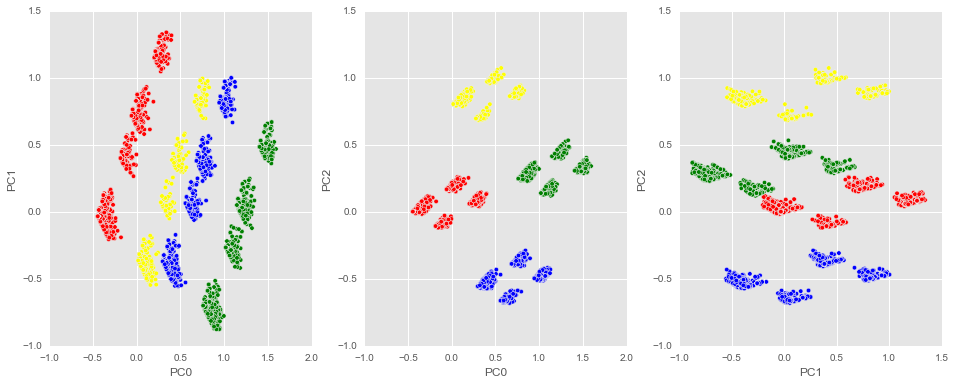

In [1547]:
new_color = cluster_.map({0: 'red', 1: 'blue', 2: 'green', 3: 'blue'\
                      ,4:'green', 5: 'red', 6: 'yellow', 7: 'yellow'\
                      ,8:'green', 9: 'blue', 10: 'blue', 11: 'red'\
                     , 12: 'red', 13: 'yellow', 14: 'green', 15: 'yellow'})

_, axes = plt.subplots(1, 3, figsize = (16, 6))

X.plot(kind = 'scatter', x = 'PC0', y = 'PC1', c = new_color, ax = axes[0])
X.plot(kind = 'scatter', x = 'PC0', y = 'PC2', c = new_color, ax = axes[1])
X.plot(kind = 'scatter', x = 'PC1', y = 'PC2', c = new_color, ax = axes[2])

The manual clustering worked as expected, now let's move into interpretation.

## Interpretation

In [73]:
channels = '''6ter
m6
w9
nrj12
cherie25
c8
france2
france3
franceo
nt1
tf1
tmc
numero23
arte
france5
rmc
lcp
france4
gulli
itele
franceinfo
lci
bfmtv
cstar
hd1
equipe21'''

channels = pd.Series(channels.splitlines())

channels

0           6ter
1             m6
2             w9
3          nrj12
4       cherie25
5             c8
6        france2
7        france3
8        franceo
9            nt1
10           tf1
11           tmc
12      numero23
13          arte
14       france5
15           rmc
16           lcp
17       france4
18         gulli
19         itele
20    franceinfo
21           lci
22         bfmtv
23         cstar
24           hd1
25      equipe21
dtype: object

In [74]:
def interpret(v):
    v = pd.Series(v).\
        sort_values(ascending = False)

    for channel in channels[v.head(13).index]:
        #print '+ {}'.format(question)
        print format(channel)

    print

    for channel in channels[v.tail(13).index]:
        #print '- {}'.format(question)
        print format(channel)

### Interpreting the principal components

In [75]:
interpret(eigenvector_0)

tf1
m6
france2
france3
bfmtv
c8
france5
w9
tmc
nrj12
gulli
equipe21
hd1

france4
nt1
rmc
6ter
cstar
arte
cherie25
itele
franceo
numero23
lci
lcp
franceinfo


In [76]:
interpret(eigenvector_1)

france2
france3
france5
arte
bfmtv
equipe21
itele
cherie25
lcp
lci
franceinfo
franceo
numero23

cstar
hd1
rmc
tmc
6ter
c8
france4
nt1
gulli
nrj12
w9
m6
tf1


In [77]:
interpret(eigenvector_2)

m6
france2
c8
w9
france5
nrj12
nt1
rmc
arte
6ter
france4
itele
numero23

equipe21
tmc
cstar
lcp
lci
franceinfo
hd1
franceo
cherie25
bfmtv
gulli
france3
tf1


### Interpreting the clusters (that's the custormer segmentation)

We first join our labels with the starting dataframe:

In [1548]:
label=new_clusters.rename("cluster")
df_lab= df_exp.join(label)

In [1556]:
df_lab

,6ter,m6,w9,nrj12,cherie25,c8,france2,france3,franceo,nt1,tf1,tmc,numero23,arte,france5,rmc,lcp,france4,gulli,itele,franceinfo,lci,bfmtv,cstar,hd1,equipe21,cluster
0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,cluster_3
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,cluster_1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,cluster_1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,cluster_2
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,cluster_1
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,cluster_1
6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,cluster_2
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,cluster_1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,cluster_1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,cluster_1


In [1559]:
centroid_cluster_1 = df_lab[df_lab.cluster == 'cluster_1'].mean()
centroid_cluster_2 = df_lab[df_lab.cluster == 'cluster_2'].mean()
centroid_cluster_3 = df_lab[df_lab.cluster == 'cluster_3'].mean()
centroid_cluster_4 = df_lab[df_lab.cluster == 'cluster_4'].mean()

In [1563]:
centroid_cluster_1.sort_values()

franceinfo    0.000000
lcp           0.000621
lci           0.000680
numero23      0.002600
franceo       0.002630
cherie25      0.005112
cstar         0.009426
itele         0.009426
6ter          0.011554
nt1           0.011938
hd1           0.014450
arte          0.016105
nrj12         0.018587
france4       0.018705
equipe21      0.019976
tmc           0.020005
rmc           0.021749
gulli         0.027334
w9            0.027452
c8            0.032180
france5       0.034337
bfmtv         0.049260
france3       0.121480
m6            0.186933
france2       0.202240
tf1           0.319287
dtype: float64

In [1564]:
centroid_cluster_2.sort_values()

franceinfo    0.000000
lci           0.000317
lcp           0.000634
franceo       0.002218
numero23      0.003169
cherie25      0.006337
itele         0.008872
cstar         0.010773
6ter          0.012674
nt1           0.013308
hd1           0.016160
arte          0.017110
tmc           0.018695
france4       0.019328
nrj12         0.019645
rmc           0.021863
equipe21      0.022814
gulli         0.026299
w9            0.027883
c8            0.030735
france5       0.037389
bfmtv         0.050063
france3       0.122940
m6            0.186629
france2       0.212928
tf1           0.315589
dtype: float64

In [1565]:
centroid_cluster_3.sort_values()

franceinfo    0.000000
lcp           0.000591
lci           0.000886
franceo       0.002462
numero23      0.003053
cherie25      0.003841
itele         0.009553
cstar         0.010242
6ter          0.010833
nt1           0.012212
arte          0.013985
hd1           0.015560
france4       0.018909
nrj12         0.019401
equipe21      0.020091
tmc           0.020878
rmc           0.021075
w9            0.028560
gulli         0.029545
c8            0.030924
france5       0.032696
bfmtv         0.045893
france3       0.117786
france2       0.189285
m6            0.189285
tf1           0.313473
dtype: float64

In [1566]:
centroid_cluster_4.sort_values()

franceinfo    0.000000
lcp           0.000142
lci           0.000709
franceo       0.001844
numero23      0.003404
cherie25      0.005390
itele         0.010071
6ter          0.010355
cstar         0.010638
nt1           0.014184
hd1           0.015745
arte          0.016312
france4       0.017730
equipe21      0.019858
tmc           0.019858
nrj12         0.020284
rmc           0.020709
gulli         0.027518
w9            0.027943
c8            0.033050
france5       0.033333
bfmtv         0.049929
france3       0.122128
france2       0.185957
m6            0.192340
tf1           0.319716
dtype: float64

In [1549]:
for i in df_exp.columns:
    print i
    print round(df_lab[df_lab.cluster=='cluster_1'][i].value_counts()[0]/float(df_lab[df_lab.cluster=='cluster_1'][i].value_counts().sum()),2)
    print round(df_lab[df_lab.cluster=='cluster_2'][i].value_counts()[0]/float(df_lab[df_lab.cluster=='cluster_2'][i].value_counts().sum()),2)
    print round(df_lab[df_lab.cluster=='cluster_3'][i].value_counts()[0]/float(df_lab[df_lab.cluster=='cluster_3'][i].value_counts().sum()),2)
    print round(df_lab[df_lab.cluster=='cluster_4'][i].value_counts()[0]/float(df_lab[df_lab.cluster=='cluster_4'][i].value_counts().sum()),2)

6ter
0.99
0.99
0.99
0.99
m6
0.81
0.81
0.81
0.81
w9
0.97
0.97
0.97
0.97
nrj12
0.98
0.98
0.98
0.98
cherie25
0.99
0.99
1.0
0.99
c8
0.97
0.97
0.97
0.97
france2
0.8
0.79
0.81
0.81
france3
0.88
0.88
0.88
0.88
franceo
1.0
1.0
1.0
1.0
nt1
0.99
0.99
0.99
0.99
tf1
0.68
0.68
0.69
0.68
tmc
0.98
0.98
0.98
0.98
numero23
1.0
1.0
1.0
1.0
arte
0.98
0.98
0.99
0.98
france5
0.97
0.96
0.97
0.97
rmc
0.98
0.98
0.98
0.98
lcp
1.0
1.0
1.0
1.0
france4
0.98
0.98
0.98
0.98
gulli
0.97
0.97
0.97
0.97
itele
0.99
0.99
0.99
0.99
franceinfo
1.0
1.0
1.0
1.0
lci
1.0
1.0
1.0
1.0
bfmtv
0.95
0.95
0.95
0.95
cstar
0.99
0.99
0.99
0.99
hd1
0.99
0.98
0.98
0.98
equipe21
0.98
0.98
0.98
0.98
